In [7]:
%pip install konlpy
%pip install wordcloud
%pip install openpyxl


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


2025-03-20 23:13:55.040 Python[55785:3440605] +[IMKClient subclass]: chose IMKClient_Modern
2025-03-20 23:13:55.437 Python[55785:3440605] The class 'NSOpenPanel' overrides the method identifier.  This method is implemented by class 'NSWindow'


데이터 프레임의 컬럼: ['Ai 금융 서비스가 투자 전문가(인간)보다 나은 점이 있다고 생각하십니까?']
           Ai 금융 서비스가 투자 전문가(인간)보다 나은 점이 있다고 생각하십니까?
0  24/7 실시간으로 데이터를 분석하여 이를 기반으로 새로운 솔루션을 제시할 수 있다...
1                                                  .
2                                            가격이 저렴함
3  각 투자자들의 투자 성향을 스스로 학습하고 그에 걸맞는 피드백을 제공함에 있어서 인...
4                                                 감정
지정한 폰트 경로를 찾을 수 없습니다. 폰트 경로를 다시 확인하세요.


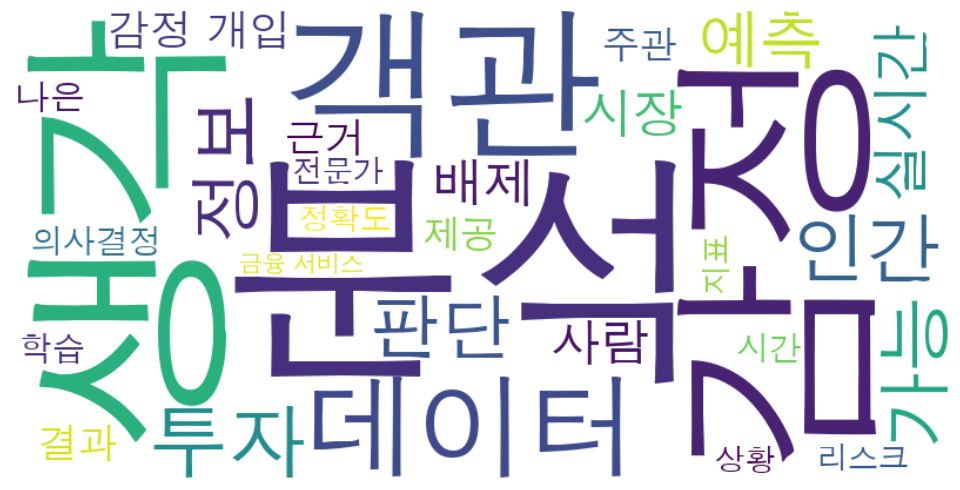

: 

In [ ]:
import sys
import subprocess

# openpyxl 설치 확인 (엑셀 파일 읽기에 필요)
try:
    import openpyxl
except ImportError:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "openpyxl"])

import pandas as pd
import matplotlib.pyplot as plt
import os
import re
from tkinter import Tk
from tkinter.filedialog import askopenfilename
from konlpy.tag import Okt
from wordcloud import WordCloud
import platform

# 파일 대화상자를 위한 Tkinter 설정 (윈도우 숨기기)
root = Tk()
root.withdraw()

# 파일 대화상자에서 엑셀 파일 선택 (확장자 .xlsx만 보이도록 설정)
file_path = askopenfilename(title="엑셀 파일 선택", filetypes=[("Excel files", "*.xlsx")])
if not file_path:
    print("파일을 선택하지 않았습니다.")
    exit()

# 엑셀 파일 읽기
df = pd.read_excel(file_path)

# 데이터 확인: 컬럼명과 상위 5개 행 출력
print("데이터 프레임의 컬럼:", df.columns.tolist())
print(df.head())

# 모든 컬럼 텍스트 합치기
all_text = ""
for col in df.columns:
    all_text += " ".join(df[col].astype(str).tolist()) + " "

# 전처리: 한글과 공백을 제외한 문자 제거
cleaned_text = re.sub(r'[^가-힣\s]', ' ', all_text)

# 형태소 분석기 (Okt)로 명사 추출
okt = Okt()
tokens = okt.nouns(cleaned_text)

# 불용어 리스트 (원하는 단어를 추가하세요)
stopwords = [
    '있다', '하다', '수', '그', '것', '등', '을', '의', '가', '되다',
    '같습니다', '합니다', '입니다', '됩니다', '때문', '낫다', '대해','대한','기반','통해',''
]

# 토큰 필터링: 한 글자 단어 및 불용어 제거
filtered_tokens = [t for t in tokens if t not in stopwords and len(t) > 1]

# 전처리된 토큰을 하나의 문자열로 합침
filtered_text = " ".join(filtered_tokens)

# 운영체제에 따라 한글 폰트 경로 설정
current_os = platform.system()
if current_os == 'Windows':
    font_path = 'C:/Windows/Fonts/malgun.ttf'
elif current_os == 'Darwin':  # macOS
    font_path = '/Library/Fonts/AppleGothic.ttf'
else:  # Linux 등
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

if not os.path.exists(font_path):
    print("지정한 폰트 경로를 찾을 수 없습니다. 폰트 경로를 다시 확인하세요.")
    exit()

# 워드 클라우드 생성 (최대 30단어)
wordcloud = WordCloud(
    font_path=font_path,
    width=800,
    height=400,
    background_color='white',
    max_words=30
).generate(filtered_text)

# 결과 출력
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()